# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>K-Nearest Neighbors (KNN)</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Watsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [Linkedin](https://www.linkedin.com/company/techproeducation/mycompany/) |

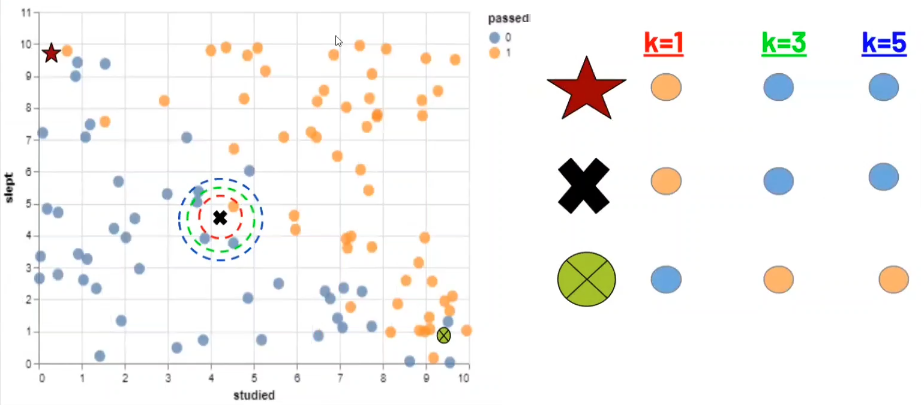

- Eğer "K" değeri çok büyükse, model veri setinin genel yapısını fazla genelleştirir ve aşırı basitleştirme (underfitting) meydana gelebilir. Bu, modelin karmaşıklığının azalması ve bireysel veri noktalarının özelliklerinin göz ardı edilmesi anlamına gelir.

- Öte yandan, "K" değeri çok küçükse (örneğin 1), model veri üzerinde aşırı uyuma (overfitting) eğiliminde olur, yani gürültülü verilere veya aykırı değerlere fazla duyarlı hale gelir.

- Small k can lead to overfitting, as the model captures too much of the noise in the training data. Large k can lead to underfitting, as the model is too simple and fails to capture the underlying structure of the data.


- A suitable k can be chosen by looking at the performance on a validation set or by using cross-validation techniques.

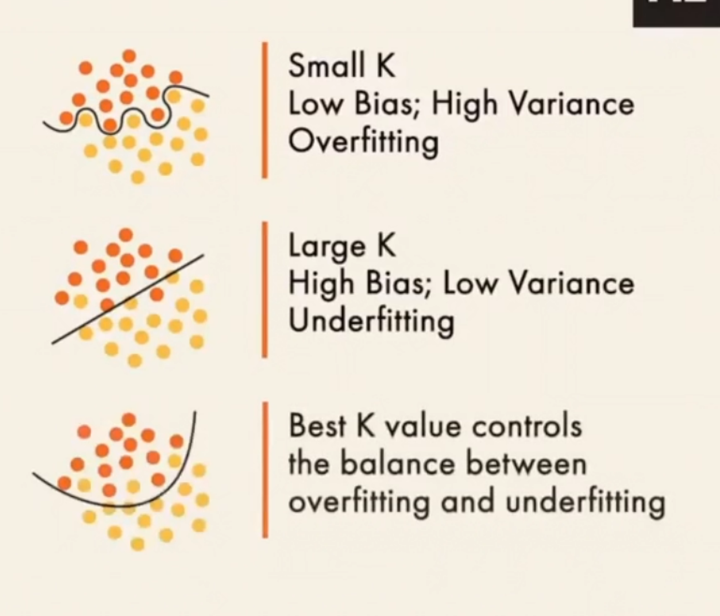

**Ayşe Hocam Sağolsun**

KNN - EN YAKIN KOMŞU
 Distance Based Algoritma Çeşidi :
 * Yani mesafeye dayalı hesaplama yapan algoritma
 * Aradaki mesafe belirleyici noktadır
 * Yeni noktanın diğer noklara olan mesafesini hesaplar. En yakın hangi sınıf ise ona dahil eder
 * Mesafeye dayalı hesaplamalarda scaled yapmak farzdır
 * KNN hesaplama yöntemleri:
 1- Öklit (en çok kullanılan)
 2- Manhattan
 * Çok kullanılmaz. En iyi scoru KNN ile aldım dersek soru işsareti ile yaklaşırlar
 * Çok güvenilir bir algoritma değildir.
 * En yakın kaç komşuya göre hesaplasın? sorusunun cevabı olan "k" yı biz belirliyoruz
 (3-5 gibi)
Dezavantajları:
 * Feature sayısı 2-3 ü geçtiği zaman mesafeyi ölçmek zorlaşıyor ve çok zaman alıyor
 * Veri setindeki gözlem (satır)sayısı büyük olduğunda her birine olan mesafeyi ölçmek çok maliyetli
Çalışma Mantığı:
 * Mesafe hesaplamalarını yapar
 * Küçükten büyüğe sort eder
 * k değerinden keser
 * Bölünen yerin üstünde kalan sınıflardan en çok hangisi varsa ona dahil eder.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

## Kanser tahmin Modeli

In [2]:
df = pd.read_csv("gene_expression.csv")
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gene One,3000.0,5.600133,1.828388,1.0,4.3,5.6,6.9,10.0
Gene Two,3000.0,5.410467,1.729081,1.0,4.0,5.4,6.7,10.0
Cancer Present,3000.0,0.500000,0.500083,0.0,0.0,0.5,1.0,1.0


In [5]:
df["Cancer Present"].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

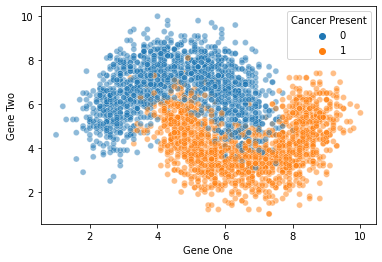

In [6]:
sns.scatterplot(x = "Gene One", y = "Gene Two", hue = "Cancer Present", data = df, alpha = 0.5);

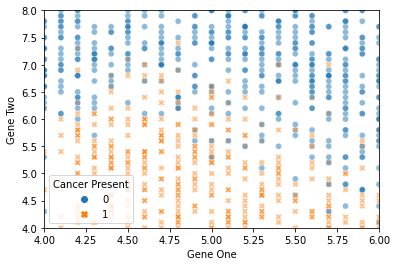

In [7]:
sns.scatterplot(x = "Gene One", y = "Gene Two", 
                hue = "Cancer Present", 
                data = df, alpha = 0.5, 
                style = "Cancer Present")
plt.xlim(4,6)
plt.ylim(4,8);

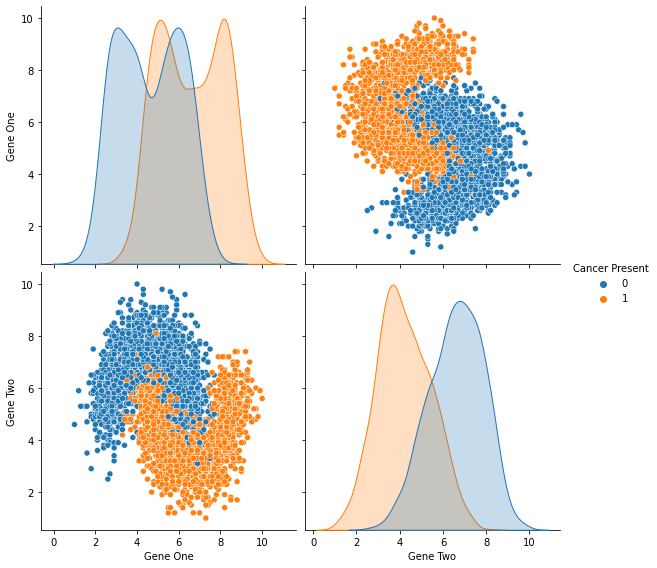

In [8]:
sns.pairplot(data = df, hue = "Cancer Present", height = 4, aspect = 1);

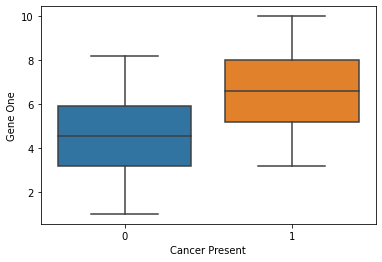

In [9]:
sns.boxplot(x = "Cancer Present", y = "Gene One", data = df );

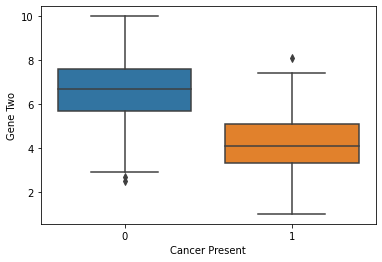

In [10]:
sns.boxplot(x = "Cancer Present", y = "Gene Two", data = df );

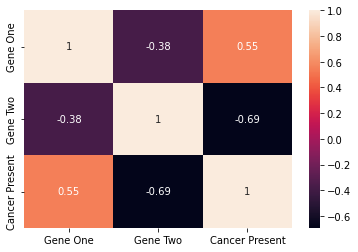

In [11]:
sns.heatmap(df.corr(), annot = True);

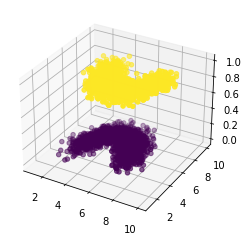

In [12]:
%matplotlib inline
#%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Gene One'], df['Gene Two'], df['Cancer Present'],c=df['Cancer Present']);

## Train|Test Split and Scaling Data